<a href="https://colab.research.google.com/github/NidhiChaurasia/LGMDataAnalytics-Intermediate-Level-Task-2-/blob/main/Prediction_using_Decision_Tree_Algorithm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
book = pd.read_csv(('/content/Iris (2).csv'))

In [ ]:
book.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
book.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
book.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Now, we check whether our data needs cleaning.For that,we plot a heatmap or our entire dataset,highlighting all null values (if any)

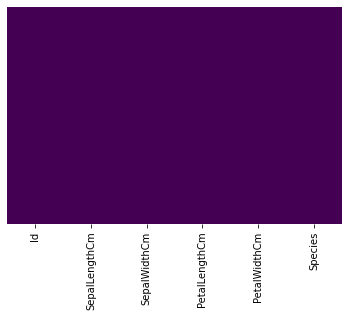

In [9]:
sns.heatmap(book.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
book.shape

(150, 6)

In [11]:
book = book.set_index("Id")

In [12]:
book.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


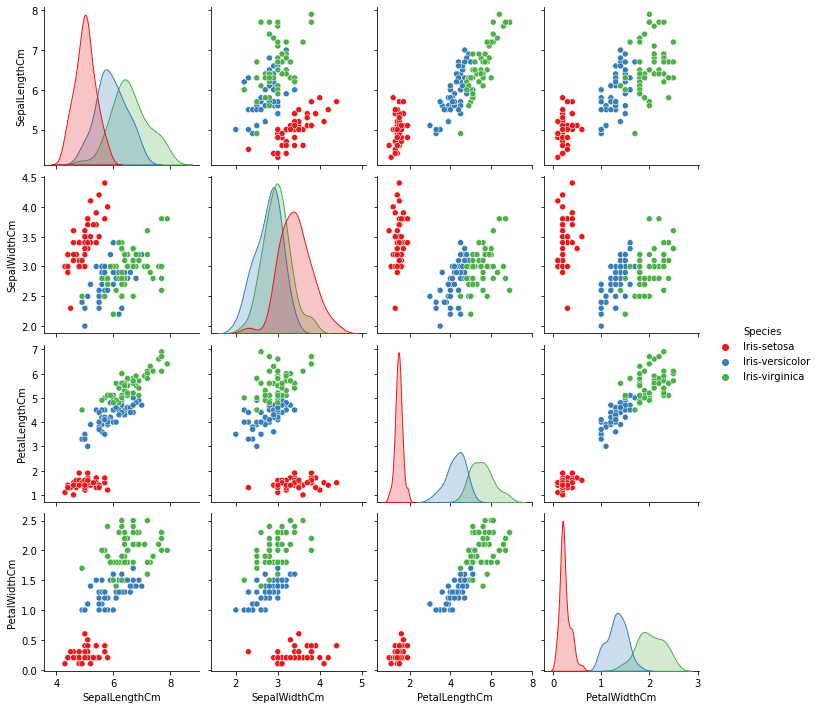

In [14]:
sns.pairplot(book,hue = 'Species',palette='Set1')

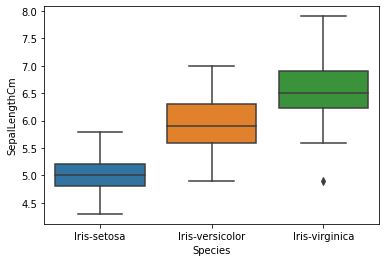

In [15]:
sns.boxplot(x="Species",y="SepalLengthCm", data =book)

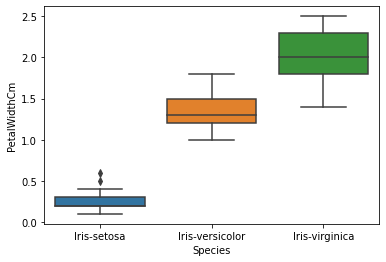

In [16]:
sns.boxplot(x="Species",y="PetalWidthCm", data=book)

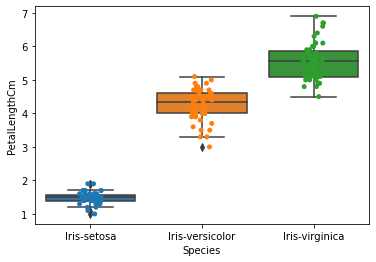

In [17]:
plot = sns.boxplot(x="Species", y="PetalLengthCm", data=book)
plot = sns.stripplot(x="Species",y="PetalLengthCm",data=book,jitter=True,edgecolor="pink")

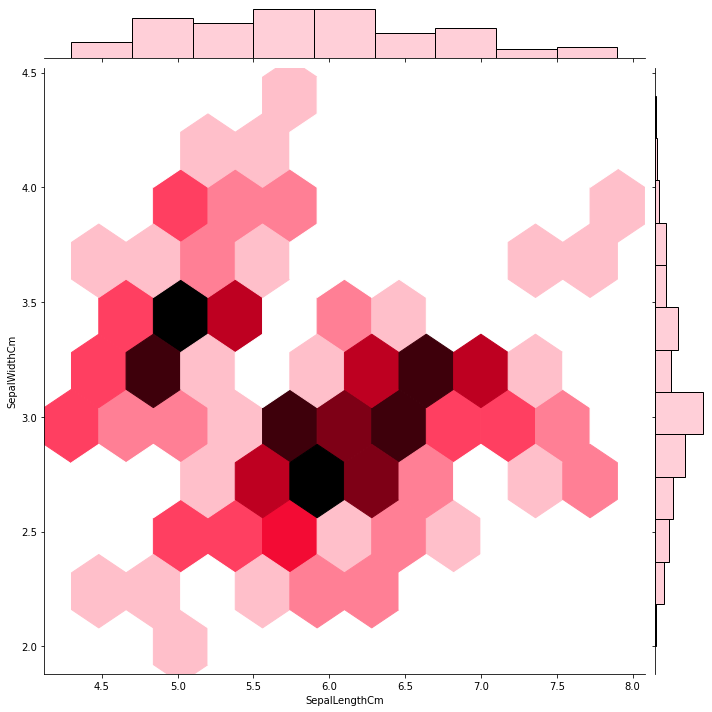

In [18]:
sns.jointplot(x="SepalLengthCm",y="SepalWidthCm",data=book,height=10,ratio=10,kind="hex",color="pink")

In [19]:
data = book.sample(frac=1)

In [20]:
book.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


ENCODE TARGET DATA

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [22]:
label_encode = LabelEncoder()

In [23]:
data['Encoded Species'] = label_encode.fit_transform(data['Species'])

In [24]:
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded Species
Id,,,,,,
137,6.3,3.4,5.6,2.4,Iris-virginica,2
140,6.9,3.1,5.4,2.1,Iris-virginica,2
30,4.7,3.2,1.6,0.2,Iris-setosa,0
40,5.1,3.4,1.5,0.2,Iris-setosa,0
147,6.3,2.5,5.0,1.9,Iris-virginica,2


Iris-Virginica - 2

#Converting label columns into an Array

In [25]:
enc_data = label_encode.fit_transform(data['Species'])
enc_data

array([2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 2, 1, 0,
       1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2,
       2, 1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 2, 2,
       2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 1, 0, 1,
       2, 0, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
iris_data = load_iris()
x = iris_data.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [28]:
data.shape

(150, 6)

In [29]:
x.shape

(150, 4)

In [30]:
y = iris_data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
x_train , x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 100)

# Building the decision tree model,training and predictions

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtree = DecisionTreeClassifier()

In [34]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
predictions = dtree.predict(x_test)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [43]:
print(confusion_matrix(y_test,predictions))

[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]


# Visualizing the decisions tree using Graphviz

In [50]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

In [51]:
import pydotplus

In [52]:
features = list(data.columns[:-2])
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [54]:
target = list(data.Species.unique())
target

['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']

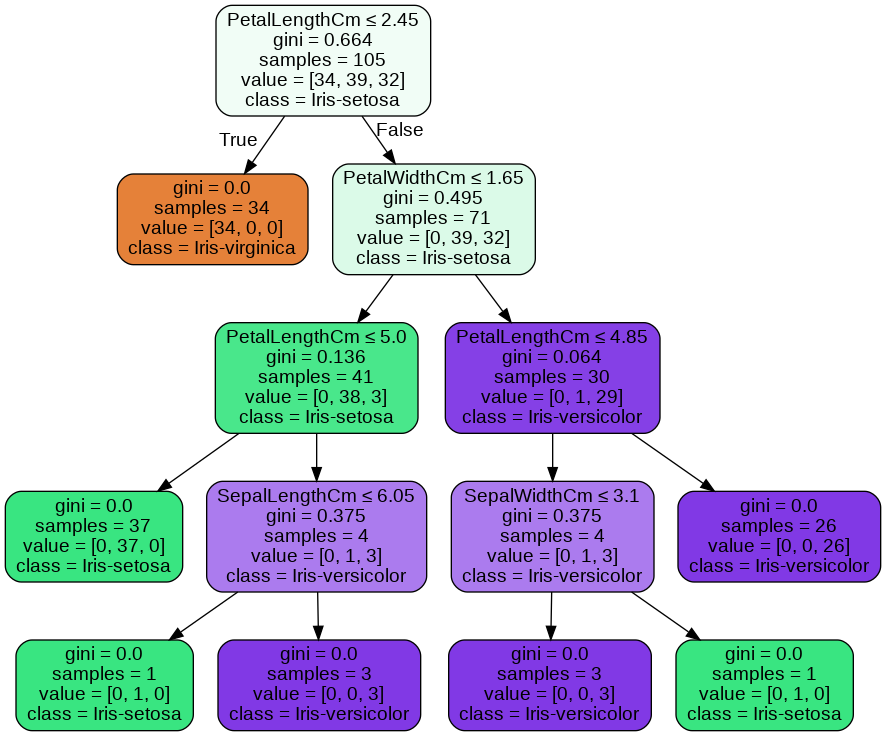

In [55]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True,special_characters=True,class_names=target)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())